In [4]:
import pandas as pd
import re
import numpy as np
import string
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize

In [5]:
data=pd.read_excel('D:/Backup/Datasets/K8 Reviews v0.2.xlsx')

In [6]:
data.head() #Dataset is scrapped from Amazon for Lenevo K8 mobile phones
#Rating of 1,2,3 --> sentiment 0
#Rating of 4 and 5 --> sentiment 0

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


## Nltk
- Packages
- Corpus
1.stopwords
2.wordnet
3.books
- pre-trained model

In [7]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [8]:
data['sentiment'].value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

## Steps for WordCloud:-
- 1. Combine all the reviews into a single string.
- 2. Initiate word cloud
- 3. Generate the word cloud

In [9]:
data.review = data.review.astype('str')
reviews = ' '.join(data.review.values)

In [10]:
reviews[:200]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.'

In [11]:
#Initiating WordCloud
word_cloud = WordCloud().generate(reviews)

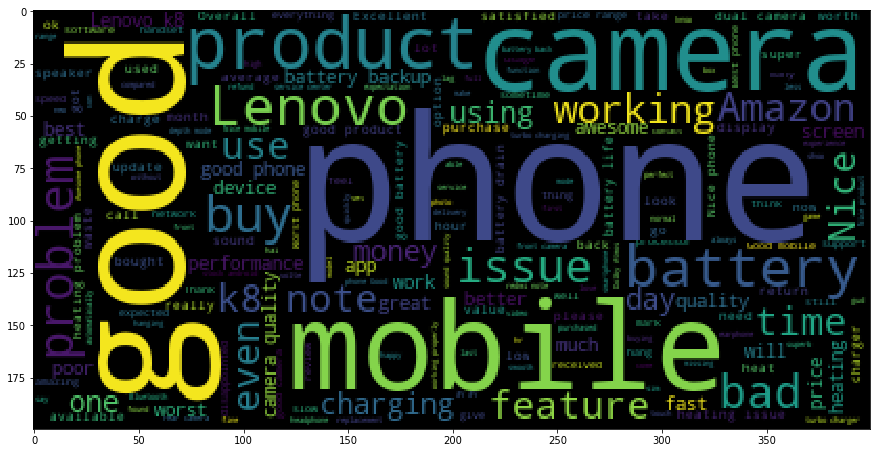

In [12]:
#Raw cloud.
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.show()

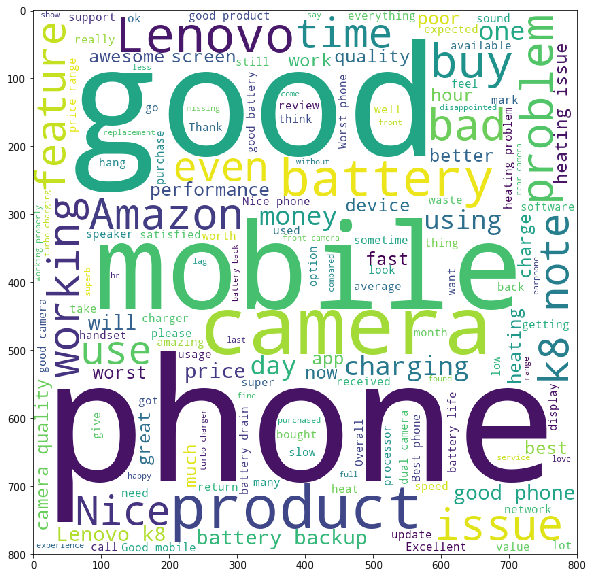

In [13]:
#Beautifying
word_cloud = WordCloud(width=800,height=800,background_color='white',
                      max_words=150).generate(reviews)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.show()

In [14]:
#Getting words and its frequency in dict-key-values.
y = {} 
for i in reviews.split(' '): 
    y[i] = y.get(i,0)+1
#conversion:
freq = {'words':list(y.keys()) , 'freq':list(y.values())}

In [15]:
mydata=pd.DataFrame(freq)
mydata.head()

,words,freq
0,Good,1315
1,but,2222
2,need,196
3,updates,98
4,and,5078


In [16]:
dat=mydata.sort_values(by='freq',ascending=False).head(25)

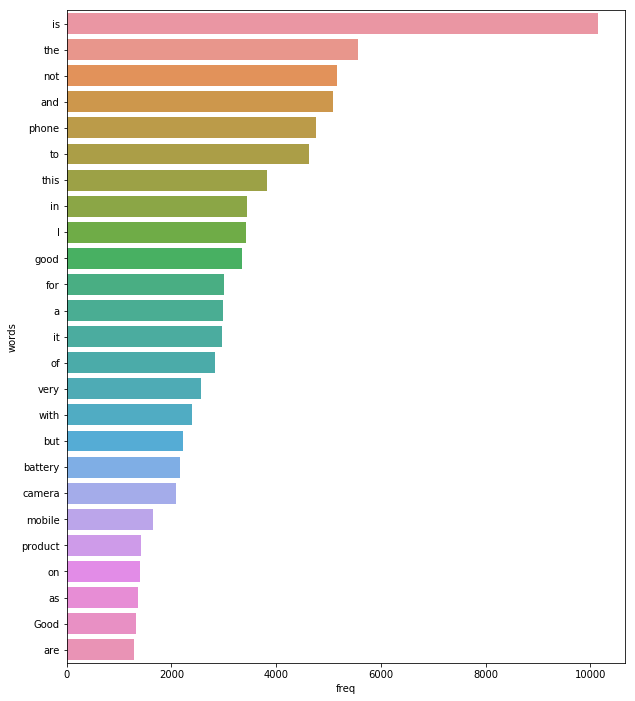

In [17]:
plt.figure(figsize=(10,12))
sns.barplot(data=dat,x='freq',y='words')
plt.show()

### Problems with these visuals :-
- Too many distinct words in the corpus of reviews
- Text not in uniform case
- Puncutations present
- Many language connectors - STOPWORDS
- Words with different forms/tenses - charged,charge,charging
### Text processing :-
- Text cleaning
- Get the visuals - wordcload,bargraph,freqnGraph
- Converting text to numeric matrices
- Advanced visuals using collocations(n-grams-unigrams-bigrams-trigrams)
- Sentiment Analysis and classification
- Text classification
- Document clustering

### Tokenizing

In [15]:
#Applying tokenizer
review=word_tokenize(reviews.lower())
print(len(reviews),len(review))

1677095 324670


### Freqn of Words

In [16]:
#Built-in method for getting freq of words.
from nltk.probability import FreqDist
fdist = FreqDist(review)
fdist

FreqDist({'.': 13529, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5361, 'to': 4697, ...})

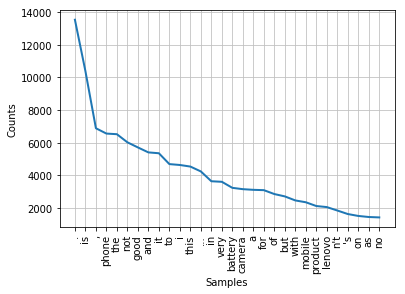

In [17]:
fdist.plot(30,cumulative=False)
plt.show()

### Removing StopWords

In [18]:
from string import punctuation
from nltk.corpus import stopwords
stop_nltk=stopwords.words("english")

In [19]:
stop_nltk=stopwords.words("english")
upd_stop = stop_nltk + ['mobile','lenovo','k8','phone','note','..','...','....',"n't"] 

In [20]:
reviews_upd = [term for term in review if term not in upd_stop and \
               term not in list(punctuation) and len(term)>2]

In [21]:
len(set(reviews_upd))

18544

### Stemming/Lemmatizing

In [22]:
from nltk.stem import PorterStemmer , SnowballStemmer
stemmer_s = SnowballStemmer('english')
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
reviews_upd=[stemmer_s.stem(word) for word in reviews_upd]
reviews_lem=[lemm.lemmatize(word) for word in reviews_upd]

In [23]:
print(len(set(reviews_upd)))
print(len(set(reviews_lem)))

16230
16213


### Building UDF of TextCleaning.

In [24]:
def cleantxt(n):
    n=word_tokenize(n.lower())
    stop_nltk=stopwords.words("english")
    upd_stop = stop_nltk + ['mobile','lenovo','k8','phone','note','..','...','....',"n't"] 
    n = [term for term in n if term not in upd_stop and \
               term not in list(punctuation) and len(term)>2]
    n=[stemmer_s.stem(word) for word in n]
    res = " ".join(n)
    return res


In [25]:
data['clean review']=data.review.apply(cleantxt)
data.head(1)

,sentiment,review,clean review
0,1,Good but need updates and improvements,good need updat improv


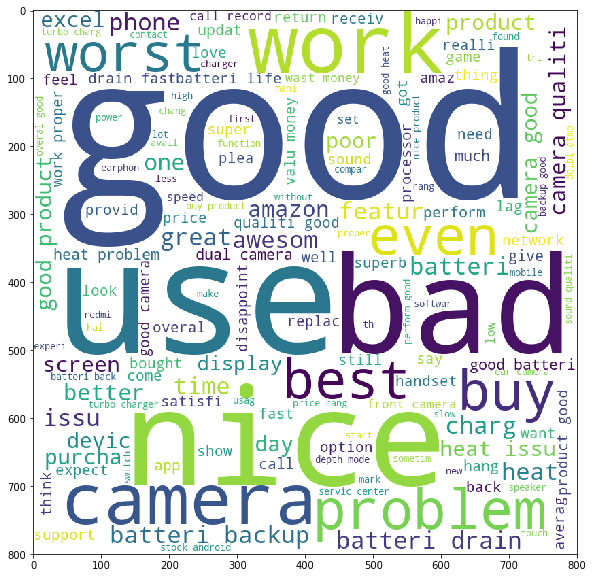

In [26]:
#New WordCloud
rev=" ".join(data['clean review'].values)
#Initiating WordCloud
word_cloud = WordCloud().generate(rev)
#Beautifying
word_cloud = WordCloud(width=800,height=800,background_color='white',
                      max_words=150).generate(rev)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.show()

## Getting the count of StopWords.

In [27]:
myreviews=[]
for i in reviews.split(' '):
    myreviews.append(i)

In [28]:
mystop=[i for i in myreviews if i in stop_nltk]
mydict={}
for i in mystop:
    mydict[i]=mydict.get(i,0)+1   
df=pd.DataFrame(mydict,index=[1])

In [29]:
df.T.reset_index().sort_values(by=1,ascending=False).head()

,index,1
4,is,10151
29,the,5565
12,not,5162
1,and,5078
6,to,4627


## Getting the Bigrams 

In [30]:
data.head()

,sentiment,review,clean review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X = count_vect.fit_transform(data['clean review'])

In [32]:
#Getting the BOW:-
count_vect.get_feature_names()
#Getting the DataFrame
DTM = pd.DataFrame(X.toarray(),columns=count_vect.get_feature_names()) #datatermmatrix
# TDM=term document matrix
TDM = DTM.T
TDM.head()

,0,1,2,3,4,5,6,7,8,9,...,14665,14666,14667,14668,14669,14670,14671,14672,14673,14674
00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000mah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#Bigrams
count_vect_bg = CountVectorizer(ngram_range=(2,2),max_features=25)
X_bg = count_vect_bg.fit_transform(data['clean review'])
DTM_bg = pd.DataFrame(X_bg.toarray(),columns=count_vect_bg.get_feature_names())
X_bg

<14675x25 sparse matrix of type '<class 'numpy.int64'>'
	with 6704 stored elements in Compressed Sparse Row format>

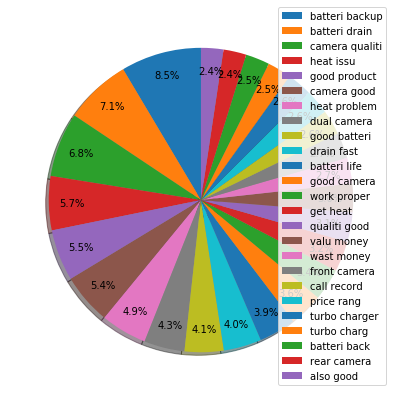

In [34]:
plt.figure(figsize=(10,7))
x=DTM_bg.sum().sort_values(ascending=False).head(25)
y=x.reset_index()
y.head(1)
plt.pie(y[0],autopct='%1.1f%%', startangle=90, pctdistance=0.85,shadow=True)
plt.legend(y['index'],loc='lower right')
plt.show()

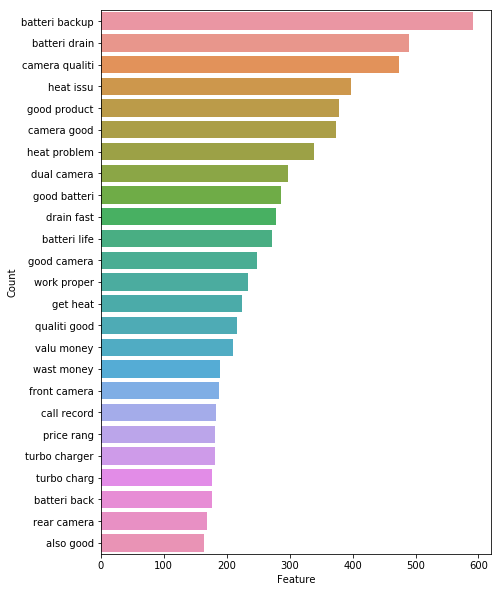

In [35]:
import seaborn as sns
plt.figure(figsize=(7,10))
sns.barplot(data=y,x=0,y='index')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

## TFIDF
- Find the top 5 relevant reviews which has the below words.
    - 'battery drain'
    - 'Good camera'
- If there is a clash in the score , review at index 0 has higher precedence than at index 1 and so on    

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect =TfidfVectorizer(ngram_range=(2,2))
X=tfidf_vect.fit_transform(data['clean review'])
tfidf = pd.DataFrame(X.toarray(),columns=tfidf_vect.get_feature_names())
tfidf.head()

,00 00,00 box,00 hour,00 realli,00 silent,00 usual,000 000,000 camera,000 discount,000 even,...,žà šà,žðÿ smooth,žðÿ worthi,žðÿ ðÿ,žðÿ žðÿ,ˆmi suggest,ˆspeaker perform,ˆà ¾à,ˆðÿ ˆmi,ˆðÿ ˆðÿ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
tfidf['batteri drain'].sort_values(ascending=False).head()

6404    0.665165
6486    0.665165
3130    0.665165
2964    0.665165
112     0.665165
Name: batteri drain, dtype: float64

In [38]:
tfidf['good camera'].sort_values(ascending=False).head(5)

13420    1.000000
1439     0.753303
3127     0.753303
10756    0.735153
10047    0.735153
Name: good camera, dtype: float64

In [39]:
data.iloc[3127].values

array([1, 'Good camera quality', 'good camera qualiti'], dtype=object)

## Sentiment Analysis

In [40]:
term_scores=pd.read_csv('C:/Users/Kishlaya/Downloads/Datasets/AFINN-111.txt',sep='\t',header=None)
term_scores.columns=['term','score']
term_dic = dict(term_scores.values)

In [41]:
def get_senti(n):
    score=0
    for i in word_tokenize(n):
        score+=term_dic.get(i,0)
    return score

In [42]:
pd.options.display.max_colwidth = 20
data['Sentiment_score']=data['clean review'].apply(get_senti)

In [43]:
data.iloc[2707]

sentiment                            0
review             Been using it si...
clean review       use sinc 2days.w...
Sentiment_score                     55
Name: 2707, dtype: object

In [44]:
data['mysent']=[1 if i>0 else 0 for i in data['Sentiment_score']]
#Sir's code - data['mysent'] = data.se

In [45]:
data.head(1)

,sentiment,review,clean review,Sentiment_score,mysent
0,1,Good but need up...,good need updat ...,3,1


In [46]:
from sklearn.metrics import confusion_matrix , accuracy_score
accuracy_score(data.sentiment,data.mysent)

0.7118228279386712

In [47]:
term_scores.sort_values(by='score',ascending=False).head()

,term,score
2179,superb,5
2234,thrilled,5
1648,outstanding,5
1226,hurrah,5
315,breathtaking,5


In [48]:
# New UDF
def cleantxt(n):
    n=word_tokenize(n.lower())
    n = [term for term in n if term not in upd_stop and term not in list(punctuation) and len(term)>2]
    res = " ".join(n)
    return res

In [49]:
data['clean_review']=data.review.apply(cleantxt)

In [50]:
data.head()

,sentiment,review,clean review,Sentiment_score,mysent,clean_review
0,1,Good but need up...,good need updat ...,3,1,good need update...
1,0,Worst mobile i h...,worst bought eve...,-8,0,worst bought eve...
2,1,when I will get ...,get cash back al...,0,0,get cash back al...
3,1,Good,good,3,1,good
4,0,The worst phone ...,worst everthey c...,-7,0,worst everthey c...


In [51]:
data['Sentiment_score_new']=data['clean_review'].apply(get_senti)

In [52]:
data.head()

,sentiment,review,clean review,Sentiment_score,mysent,clean_review,Sentiment_score_new
0,1,Good but need up...,good need updat ...,3,1,good need update...,3
1,0,Worst mobile i h...,worst bought eve...,-8,0,worst bought eve...,-8
2,1,when I will get ...,get cash back al...,0,0,get cash back al...,0
3,1,Good,good,3,1,good,3
4,0,The worst phone ...,worst everthey c...,-7,0,worst everthey c...,-7


In [53]:
data['mysent1']=[1 if i>0 else 0 for i in data['Sentiment_score_new']]

In [54]:
accuracy_score(data.sentiment,data.mysent1)

0.7467802385008517

## Vader_analysis

In [55]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']
data['Vader_score']=data['review'].apply(get_vader_sentiment)
data['Vade']=[1 if i>0.3 else 0 for i in data['Vader_score']]
accuracy_score(data.sentiment,data.Vade)

0.7990459965928449

## Building our model

In [56]:
X=data['clean review'].values
Y=data['sentiment'].values

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [58]:
#Creating a doc term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vect = CountVectorizer()

In [59]:
x_train_bow=count_vect.fit_transform(X_train)
X_test_bow=count_vect.transform(X_test)

In [60]:
print(x_train_bow.shape,X_test_bow.shape)

(10272, 8604) (4403, 8604)


In [61]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train_bow,Y_train)
y_test_pred = log.predict(X_test_bow)

C:\Users\Kishlaya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [62]:
y_test_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [63]:
accuracy_score(Y_test,y_test_pred)

0.8546445605269135

# Clustering

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect =TfidfVectorizer(max_features=2000)
X=tfidf_vect.fit_transform(data['clean review'])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,random_state=0)
y_means = kmeans.fit_predict(X.toarray())

In [66]:
BOW=tfidf_vect.get_feature_names()
num_clusters = 5
arr=kmeans.cluster_centers_
ordered_clu = arr.argsort()[:,::-1]
for i in range(num_clusters):
    print('Cluster :',i)
    for i in ordered_clu[i,:5]:
        print(BOW[i])

Cluster : 0
nice
product
good
one
camera
Cluster : 1
good
product
one
batteri
camera
Cluster : 2
awesom
product
camera
good
price
Cluster : 3
good
batteri
camera
heat
product
Cluster : 4
best
excel
super
price
product


In [67]:
data['Cluster']=y_means

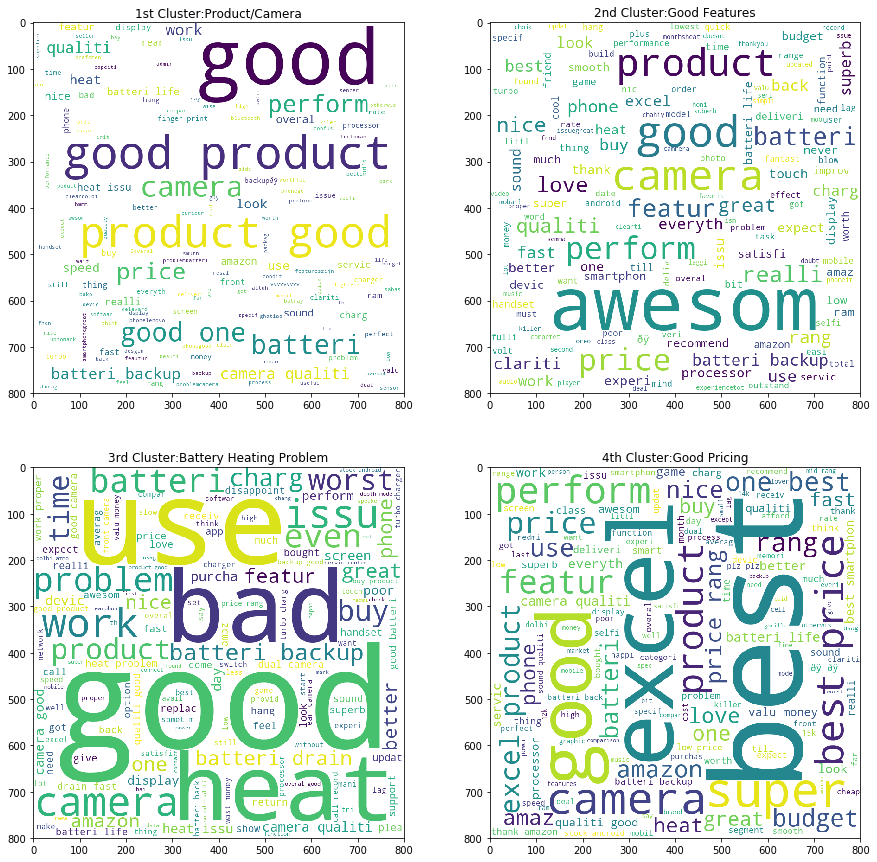

In [68]:
f, axs = plt.subplots(2,2,figsize=(15,15))
plt.subplot(2,2,1)
mydat1=data.query('Cluster==1')
rev1=" ".join(mydat1['clean review'].values)
word_cloud = WordCloud().generate(rev1)
word_cloud = WordCloud(width=800,height=800,background_color='white',
                      max_words=150).generate(rev1)
plt.title('1st Cluster:Product/Camera')
plt.imshow(word_cloud)

plt.subplot(2,2,2)
mydat2=data.query('Cluster==2')
rev2=" ".join(mydat2['clean review'].values)
word_cloud = WordCloud().generate(rev2)
word_cloud = WordCloud(width=800,height=800,background_color='white',
                      max_words=150).generate(rev2)
plt.title('2nd Cluster:Good Features')
plt.imshow(word_cloud)

plt.subplot(2,2,3)
mydat3=data.query('Cluster==3')
rev3=" ".join(mydat3['clean review'].values)
word_cloud = WordCloud().generate(rev3)
word_cloud = WordCloud(width=800,height=800,background_color='white',
                      max_words=150).generate(rev3)
plt.title('3rd Cluster:Battery Heating Problem')
plt.imshow(word_cloud)

plt.subplot(2,2,4)
mydat4=data.query('Cluster==4')
rev4=" ".join(mydat4['clean review'].values)
word_cloud = WordCloud().generate(rev4)
word_cloud = WordCloud(width=800,height=800,background_color='white',
                      max_words=150).generate(rev4)
plt.title('4th Cluster:Good Pricing')
plt.imshow(word_cloud)

In [69]:
data['review'].iloc[1]

"Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me."

In [70]:
from sklearn.metrics.pairwise import cosine_similarity
cs_docs=cosine_similarity(DTM)
cs_docs


array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ],
       [0.        , 1.        , 0.06030227, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06030227, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.25      , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [71]:
ind = int(cs_docs[1].argsort()[::-1][1:2])
print('document which is very close to doc0 is',DTM.index[ind])

documents[index]

document which is very close to doc0 is 3350


NameError: name 'documents' is not defined

In [ ]:
for i in cs_docs[1].argsort()[::-1][1:6]:
    print(data['review'].iloc[i])

In [ ]:
pd.DataFrame(data.review.values[cs_docs[1].argsort()[::-1][1:6]])

In [ ]:
data['Vader_score'].min().iloc

In [ ]:
a = data.sort_values(by='Vader_score').head(1).index[0]
a


In [ ]:
pd.DataFrame(data.review.values[cs_docs[a].argsort()[::-1][1:6]])

In [ ]:
#Finding similarity between words
cs_words = cosine_similarity(DTM.T)

In [ ]:
sm_mat = pd.DataFrame(cs_words,columns=DTM.columns,index=DTM.columns)
sm_mat.head(1)

In [ ]:
#Top 5 words which are used along with election based on the similarity score
sm_mat['drain'].sort_values(ascending=False).head(5)

### Building UDF for similar words

In [ ]:
def sim_word(word,sm_mat):
    cs_words = cosine_similarity(DTM.T)
    sm_mat = pd.DataFrame(cs_words,columns=DTM.columns,index=DTM.columns)
    cos_values = sm_mat[word].sort_values(ascending=False)
    simwords = cos_values.drop(word).head(5)
    return simwords

In [ ]:
sim_word('drain',sm_mat)

In [ ]:
import gensim
from gensim import corpora
doc_clean = [cleantxt(doc).split() for doc in data['clean review']]
#Creating the ternm dictionary of our corpus , where every unique term is assigned an index
dictionary = corpora.Dictionary(doc_clean)

#Converting list of documents(corpus) into DTM using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

[[(dictionary[id],freq) for id,freq in value] for value in doc_term_matrix[:3]]

#Importing the LDA model
from gensim.models.ldamodel import LdaModel

#Running and Traning LDA model on the document term matrix.
ldamodel = LdaModel(doc_term_matrix, num_topics=2, id2word=dictionary, passes=50, random_state=42)


topn = [i for i in ldamodel.get_topic_terms(topicid=0,topn=20)]

[(dictionary[id],prob) for id,prob in topn]

#To  get the topic distribution in each document
ldamodel.get_document_topics(doc_term_matrix[4])